# **SC1015 MINI-PROJECT GROUP 4**

# Install libraries

In [77]:
%pip install scikit-learn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install lightgbm
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [42 lines of output]
      2024-04-20 15:22:34,784 - scikit_build_core - INFO - RUN: /private/var/folders/sp/hfd67s8953g8n1_ctrppx_t40000gn/T/pip-build-env-np1zcjzq/normal/lib/python3.11/site-packages/cmake/data/bin/cmake -E capabilities
      2024-04-20 15:22:34,789 - scikit_build_core - INFO - CMake version: 3.29.2
      *** scikit-build-core 0.9.1 using CMake 3.29.2 (

# Load the dataset

In [78]:
import pandas as pd

# Load the dataset
heart_failure_df = pd.read_csv('heart.csv')

feature_names = heart_failure_df.columns[:-1]
target_col_name = 'HeartDisease'
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Segment']

assert len(feature_names) == len(cat_features) + len(num_features) # sanity check

heart_failure_df.head() # display the first few rows of the dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Simple processing and run

## Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder # Encode categorical features

label_encoder = LabelEncoder()

X = heart_failure_df.drop(target_col_name, axis=1)
y = heart_failure_df[target_col_name]

for col in cat_features:
    X[col] = label_encoder.fit_transform(X[col])

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [80]:
from sklearn.model_selection import train_test_split # Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Helper functions

In [81]:
from matplotlib import pyplot as plt
import numpy as np

# Plot confusion matrix with annotations
def plot_confusion_matrix(cm, classes=['Negative', 'Positive'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        pass
        # print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Random forest


from sklearn.metrics import confusion_matrix


rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)


rf_train_acc = rf_clf.score(X_train, y_train)

rf_test_conf_matrix = confusion_matrix(y_test, rf_clf.predict(X_test), normalize='true')
print(f"Random Forest training accuracy: {rf_train_acc}")
plt.figure()
plot_confusion_matrix(rf_test_conf_matrix, normalize=True, title='Random Forest Confusion Matrix')
plt.show()

rf_feature_importances = rf_clf.feature_importances_
indices = np.argsort(rf_feature_importances)[::-1]


print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], rf_feature_importances[indices[f]]))

 **Histogram Visualization Function**

In [82]:
def visualiseHistograms(data: pd.DataFrame, visualizableFields = []):
  n = len(visualizableFields)
  n = n // 2 + (n % 2 != 0)

  plt.figure(figsize = (10, 12))

  for idx, value in enumerate(visualizableFields):
    plt.subplot(n, 2, idx+1)
    data[value].hist()
    plt.title(f"{value} Distribution")
    plt.tight_layout(pad=2)

# **Data Analysis And Visualisation**

/var/folders/sp/hfd67s8953g8n1_ctrppx_t40000gn/T/ipykernel_80246/2522488909.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)


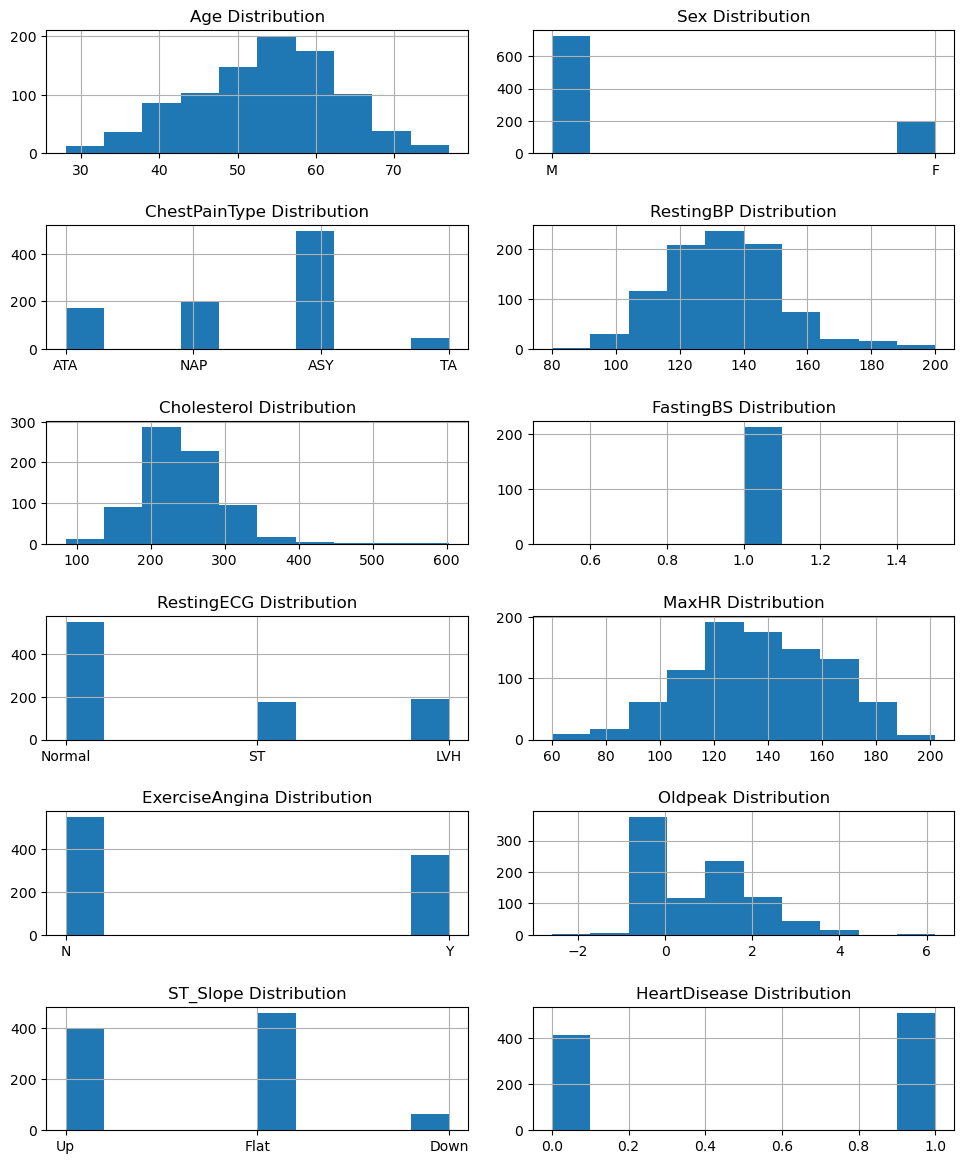

In [97]:
visualiseHistograms(heart_failure_df,heart_failure_df.columns)

In [98]:
heart_failure_df['Cholesterol'] = np.where(heart_failure_df['Cholesterol'] == 0, np.nan, heart_failure_df['Cholesterol'])
heart_failure_df['RestingBP'] = np.where(heart_failure_df['RestingBP'] == 0, np.nan, heart_failure_df['RestingBP'])
heart_failure_df['FastingBS'] = np.where(heart_failure_df['FastingBS'] == 0, np.nan, heart_failure_df['FastingBS'])

<Axes: xlabel='ChestPainType', ylabel='count'>

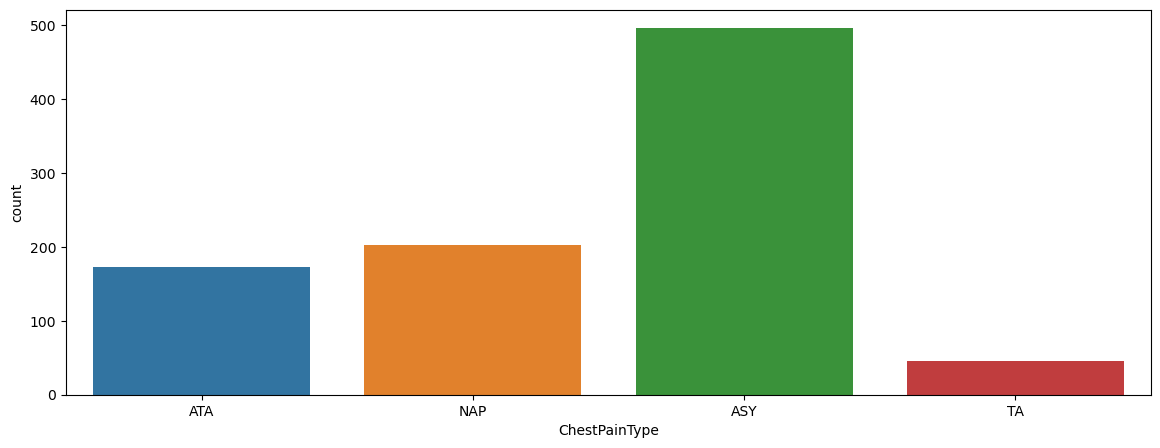

In [99]:
fig = plt.figure(figsize = (14,5))
sns.countplot(x = heart_failure_df['ChestPainType'])

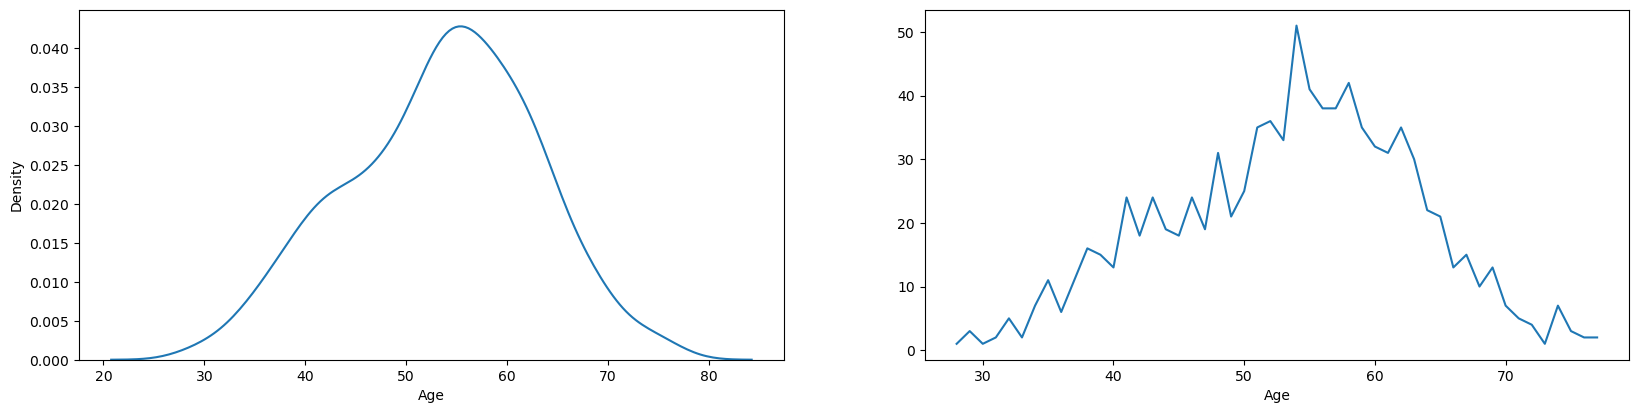

In [100]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(heart_failure_df.Age.dropna())

ax2 = fig.add_subplot(222)
heart_failure_df['Age'].value_counts().sort_index().plot.line()
plt.show()

/var/folders/sp/hfd67s8953g8n1_ctrppx_t40000gn/T/ipykernel_80246/3512098102.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = heart_failure_df, color = 'r' , shade = False)


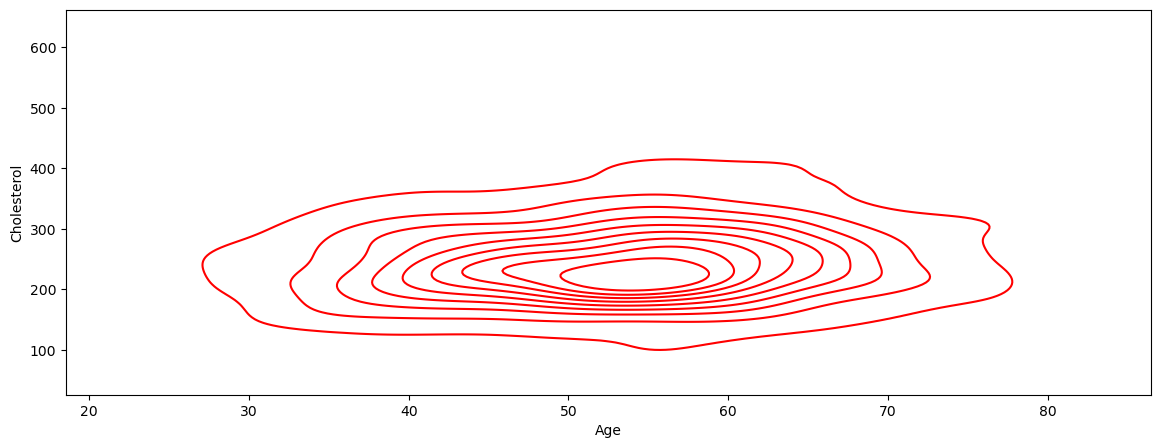

In [101]:
fig = plt.figure(figsize = (14,5))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = heart_failure_df, color = 'r' , shade = False)
plt.show()

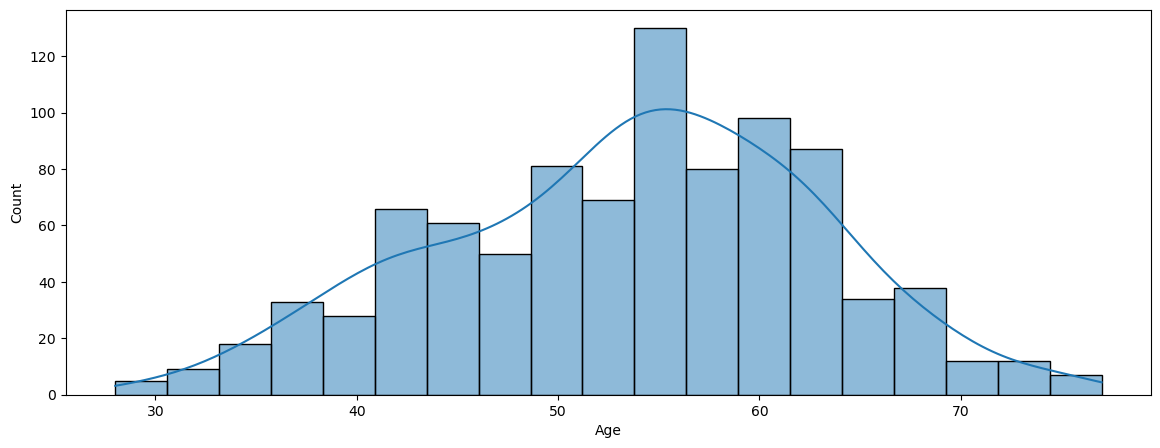

In [102]:
fig = plt.figure(figsize = (14,5))
sns.histplot(heart_failure_df['Age'], kde = True)
plt.show()

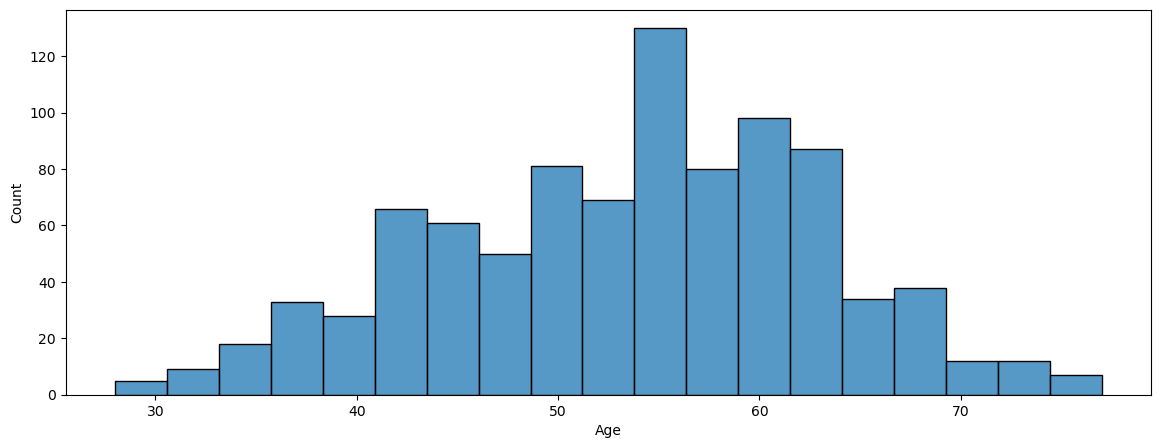

In [103]:
fig = plt.figure(figsize = (14,5))
sns.histplot(heart_failure_df['Age'], kde = False)
plt.show()

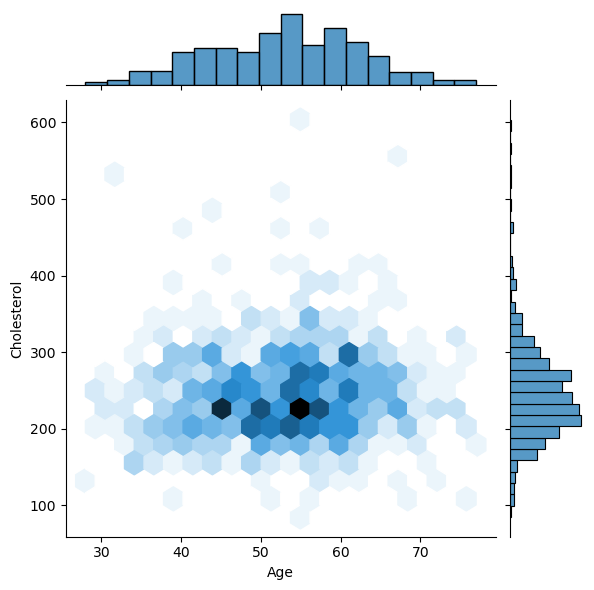

In [105]:
sns.jointplot(x = 'Age', y = 'Cholesterol', data = heart_failure_df, kind = 'hex',gridsize = 20)
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

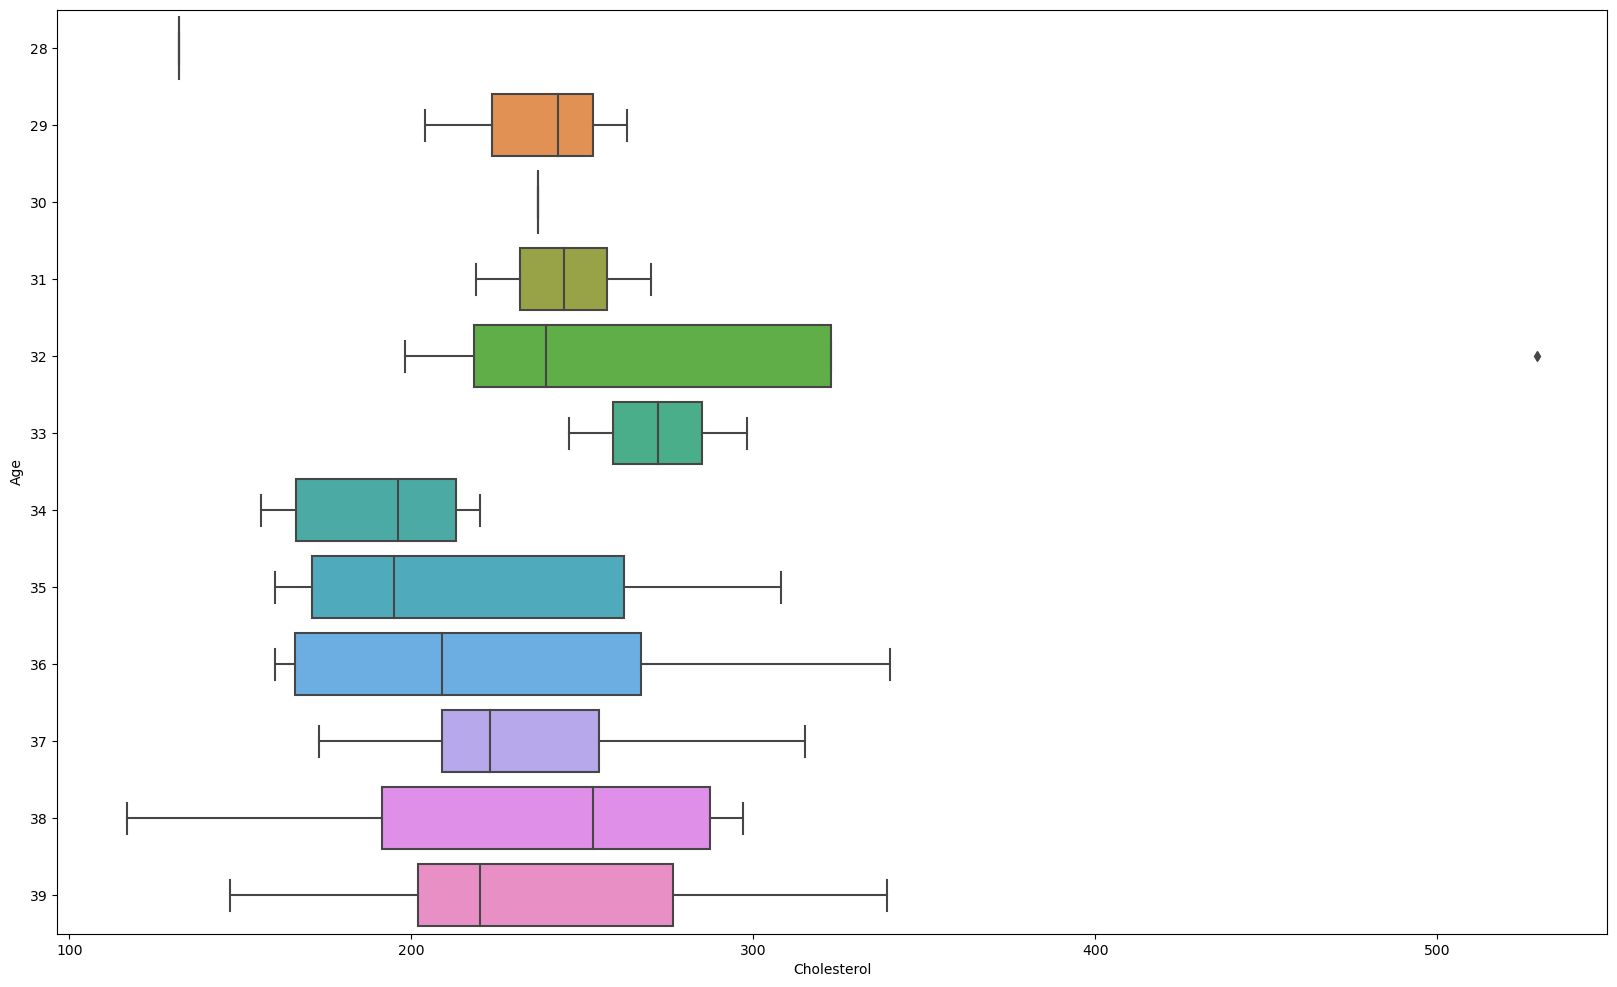

In [106]:
plt.figure(figsize = (20,12))
sns.boxplot(y = 'Age', x = 'Cholesterol', data = heart_failure_df[heart_failure_df.Age.isin(np.arange(20,40,1))],orient = 'h')

<Axes: xlabel='Sex', ylabel='MaxHR'>

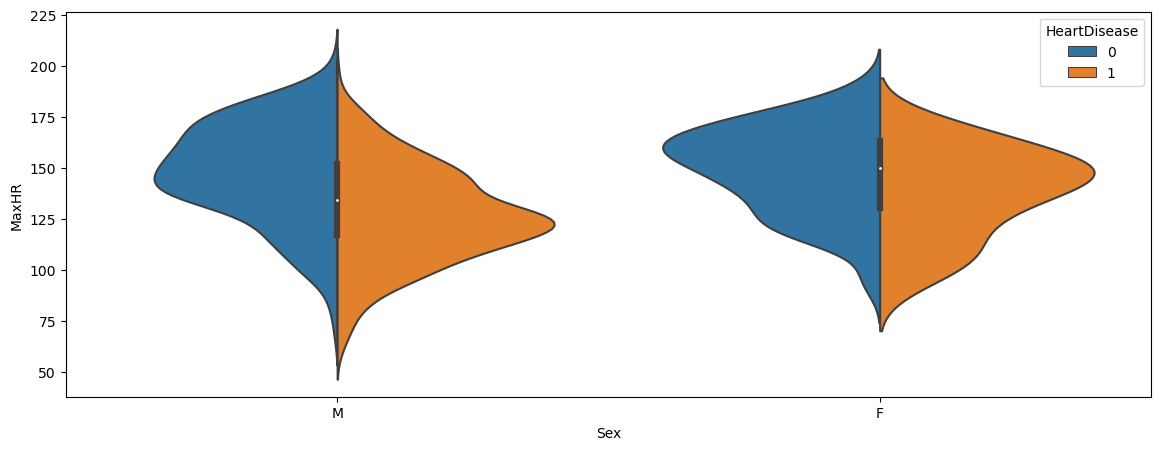

In [107]:
fig = plt.figure(figsize = (14,5))
sns.violinplot(y = 'MaxHR',x = 'Sex', hue = 'HeartDisease', split = True, data = heart_failure_df)

/Users/aviral/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


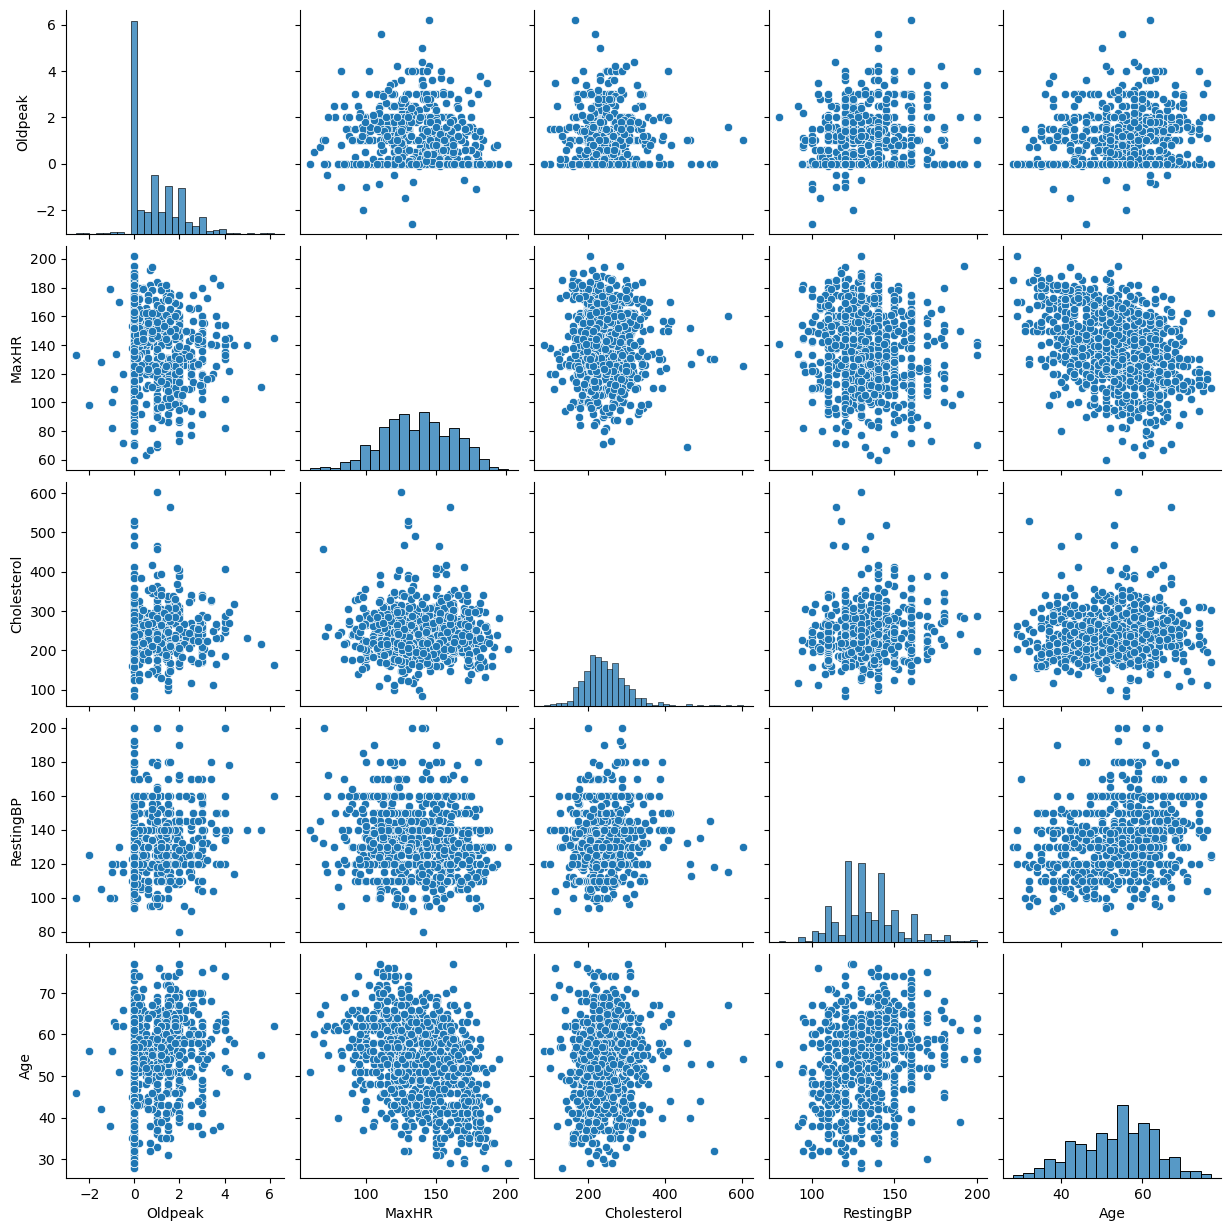

In [108]:
cols = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(heart_failure_df[cols])

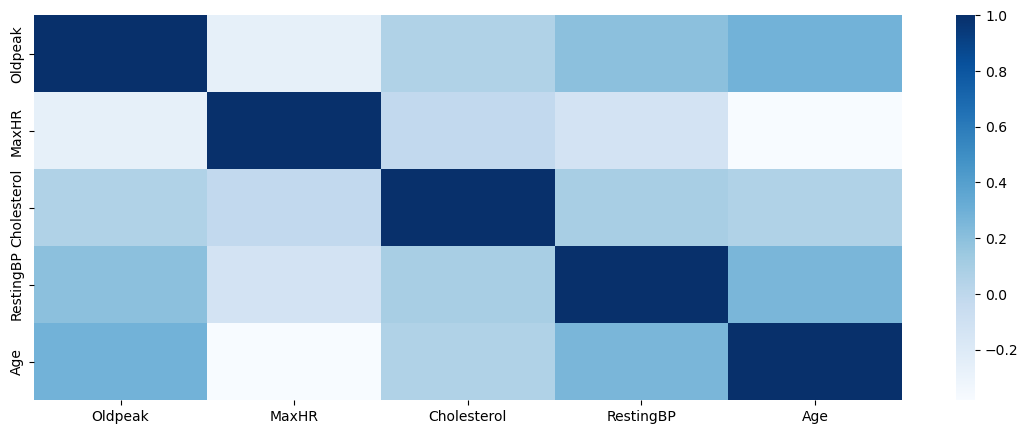

In [109]:
fig = plt.figure(figsize = (14,5))
sns.heatmap(heart_failure_df[cols].dropna().corr(), cmap = 'Blues')
plt.show()

In [110]:
heart_failure_df[cols].dropna().corr()

,Oldpeak,MaxHR,Cholesterol,RestingBP,Age
Oldpeak,1.000000,-0.259533,0.058488,0.198575,0.286006
MaxHR,-0.259533,1.000000,-0.019856,-0.125774,-0.382112
Cholesterol,0.058488,-0.019856,1.000000,0.095939,0.058758
RestingBP,0.198575,-0.125774,0.095939,1.000000,0.259865
Age,0.286006,-0.382112,0.058758,0.259865,1.000000


## LightGBM

In [111]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

train_data = lgb.Dataset(X_train, label=y_train)

# Set LightGBM parameters for binary classification
params = {
    'objective': 'binary',  # Set the objective function to binary
    'metric': 'binary_logloss',  # Use binary_logloss as the evaluation metric
    "verbosity": -1
}

# Train the LightGBM model
num_round = 200
lgb_model = lgb.train(params, train_data, num_round)

# Predict the test set
y_pred = lgb_model.predict(X_test)
# Convert the predicted probabilities to binary
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate the accuracy of training
train_acc = accuracy_score(y_train, np.where(lgb_model.predict(X_train) > 0.5, 1, 0))
print(f"LightGBM training accuracy: {train_acc}")
# Calculate the confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_pred_binary, normalize='true')
plt.figure()
plot_confusion_matrix(test_conf_matrix, normalize=True, title='LightGBM Confusion Matrix')
plt.show()

# Get feature importance
lightgbm_feature_importances = lgb_model.feature_importance(importance_type='gain')
sorted_idx = np.argsort(lightgbm_feature_importances)[::-1]

# Print the feature importance ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print("%d. Feature %d (%s): %f" % (i + 1, idx, feature_names[idx], lightgbm_feature_importances[idx]))

ModuleNotFoundError: No module named 'lightgbm'

##### False Negative is still very high, considered for a medical classication problem, this is where we want to focus on improving.
##### Both _RandomForst_ and _LightGBM_ agree on the top 3 most important features, by order: _ST\_Slope_, _Oldpeak_, _Cholesterol_.

## Checking if imbalance in target

In [112]:
print(y.value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


##### Around 25% higher for Positive

Random Forest training accuracy (balanced): 1.0


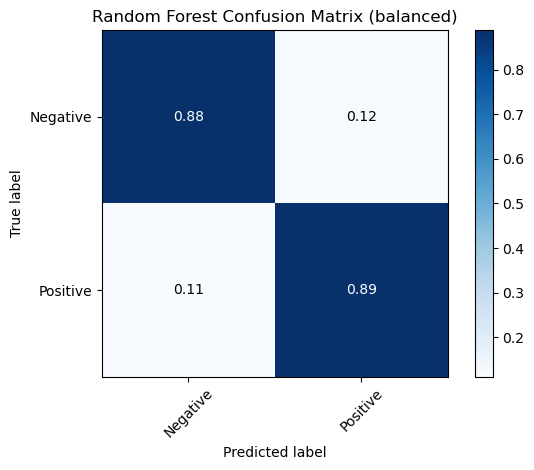

In [113]:
# Try different class_weight settings
rf_clf_balanced = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

rf_clf_balanced.fit(X_train, y_train)

# Evaluate the classifier
rf_train_acc_balanced = rf_clf_balanced.score(X_train, y_train)
# Confusion matrix
rf_test_conf_matrix_balanced = confusion_matrix(y_test, rf_clf_balanced.predict(X_test), normalize='true')
print(f"Random Forest training accuracy (balanced): {rf_train_acc_balanced}")
plot_confusion_matrix(rf_test_conf_matrix_balanced, normalize=True, title='Random Forest Confusion Matrix (balanced)')
plt.show()

Random Forest training accuracy (extreme): 1.0


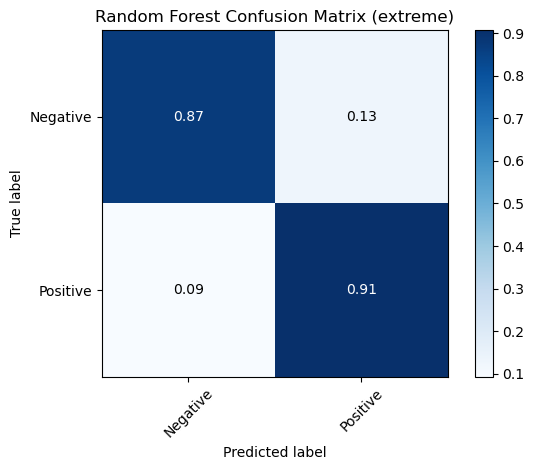

In [114]:
# A more extreme class weight setting
# Increasing the weight of the negative class to tell the model to focus more on the cases it thinks are negative
rf_clf_extreme = RandomForestClassifier(n_estimators=200, class_weight={0: 10, 1: 1}, random_state=42)

rf_clf_extreme.fit(X_train, y_train)

# Evaluate the classifier
rf_train_acc_extreme = rf_clf_extreme.score(X_train, y_train)
# Confusion matrix
rf_test_conf_matrix_extreme = confusion_matrix(y_test, rf_clf_extreme.predict(X_test), normalize='true')
print(f"Random Forest training accuracy (extreme): {rf_train_acc_extreme}")
plot_confusion_matrix(rf_test_conf_matrix_extreme, normalize=True, title='Random Forest Confusion Matrix (extreme)')
plt.show()

##### It does help a bit with the False Negative rate!

# More features engineering